MLP for Complex Problems: The MNIST dataset
=========



In [ ]:
# import of numpy and keras libraries
from __future__ import print_function
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras import utils
import matplotlib.pyplot as plt

# variables for network and training
N_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
N_CLASSES = 10
OPTIMIZER = SGD(learning_rate=0.1)
N_HIDDEN = 128   # number of hidden units
VALIDATION_SPLIT=0.2

RESHAPED = 784

np.random.seed(1671)


11490434/11490434 [==============================] - 1s 0us/step
Training data input shape:  (60000, 28, 28)
Training data output shape:  (60000,)
Test data input shape:  (10000, 28, 28)
Test data ouput shape:  (10000,)
Sample input image: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0 

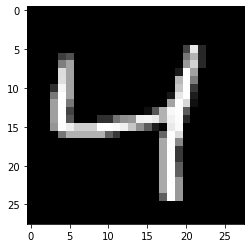

In [ ]:
(input_X_train, output_Y_train), (input_X_test, output_Y_test) = mnist.load_data()

print("Training data input shape: " , input_X_train.shape)
print("Training data output shape: " , output_Y_train.shape)
print("Test data input shape: " , input_X_test.shape)
print("Test data ouput shape: " , output_Y_test.shape)

Selected_Image = 2
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image, cmap='gray')
plt.show()


In [ ]:
# use 60000 images for training, 10000 for validation test
input_X_train = input_X_train.reshape(60000, RESHAPED)
input_X_test = input_X_test.reshape(10000, RESHAPED)
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')

# normalisation of the pixel values from 0-255 range to 0-1 range
input_X_train /= 255
input_X_test /= 255

print ("Input data ready")

Input data ready


In [ ]:
# convert class vectors to binary class matrices
output_Y_train = utils.to_categorical(output_Y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_Y_test, N_CLASSES)

# print the categorical, one-hot output vector for the sample image
label = output_Y_train[Selected_Image]
print ("One-hot-vector: " + str(label))

One-hot-vector: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Training the Simple Perceptron
=========


In [ ]:
# Defaults sequential model
model = Sequential()
model.add(Dense(N_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the network
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)



In [ ]:
#test the network using the generalisation test dataset
score = model.evaluate(input_X_test, output_Y_test, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print("Test accuracy:", score[1])


Training the Multi-Layer Perceptron
=========



In [ ]:
N_EPOCH = 20
N_HIDDEN = 128

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [ ]:
#train the network
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


In [ ]:
#test the network
score = model.evaluate(input_X_test, output_Y_test, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# import the dropout layer type
from tensorflow.keras.layers import Dropout

# Probability of weights dropout
P_DROPOUT = 0.3

N_EPOCH = 20

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(P_DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(P_DROPOUT))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])


In [ ]:
#train the network
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


In [ ]:
#test the network
score = model.evaluate(input_X_test, output_Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print("Test accuracy:", score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()